# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined dataset
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID') 
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
combined_df.groupby('Timepoint').count()['Mouse ID']

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Mouse ID, dtype: int64

In [3]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[(combined_df.duplicated() == True)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
combined_df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [6]:
combined_df.loc[combined_df["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg_group = cleaned_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = drug_reg_group.mean()['Tumor Volume (mm3)']
drug_median = drug_reg_group.median()['Tumor Volume (mm3)']
drug_variance = drug_reg_group.var()['Tumor Volume (mm3)']
drug_std_dev = drug_reg_group.std()['Tumor Volume (mm3)']
drug_sem = drug_reg_group.sem()['Tumor Volume (mm3)']
 
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumor Volume":drug_mean,"Median Tumor Volume":drug_median, "Tumor Volume Variance":
                            drug_variance,"Tumor Volume Std. Dev.":drug_std_dev, "Tumor Volume Std. Err":drug_sem})

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
##drug_tumor_group = cleaned_df.groupby("Drug Regimen", "Tumor Volume (mm3)")
# Using the aggregation method, produce the same summary statistics in a single line.
##cleaned_df["Tumor Volume (mm3)"].agg({'Tumor Volume (mm3)':'mean', 'Tumor Volume (mm3)':'median','Tumor Volume (mm3)':'var'})

## Bar and Pie Charts

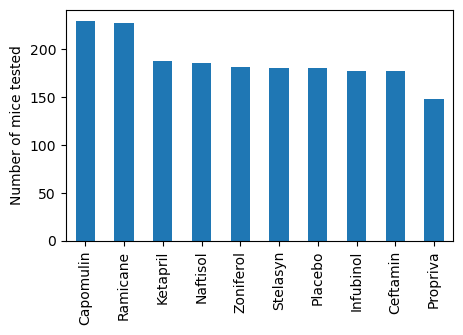

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = cleaned_df["Drug Regimen"].value_counts()
pandas_chart = pandas_bar.plot(kind='bar', figsize=(5,3))
pandas_chart.set_ylabel("Number of mice tested");

In [13]:
pandas_bar.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

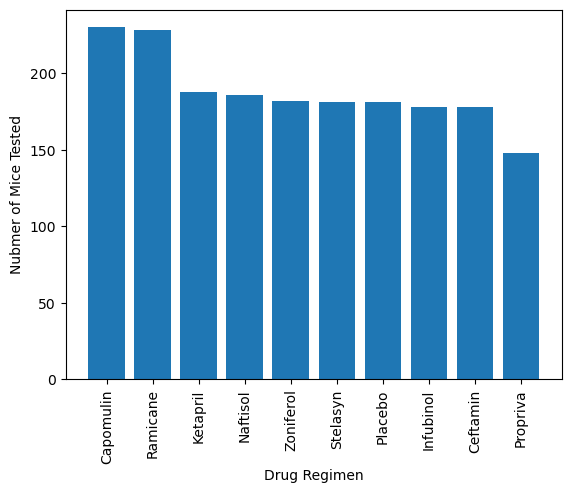

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = pandas_bar.values.tolist()
x_axis = pandas_bar.index.tolist()
plt.bar(x_axis, y_axis, align="center")
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Nubmer of Mice Tested");

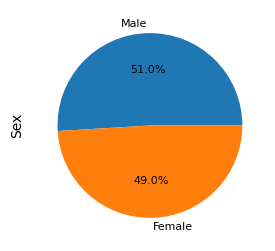

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_panda = cleaned_df['Sex'].value_counts()
gender_panda.plot(kind='pie', autopct="%.1f%%", figsize=(3,3), fontsize=8);

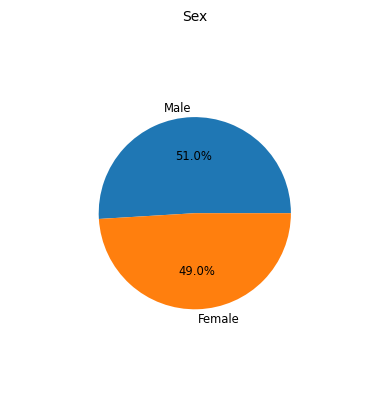

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = gender_panda.values.tolist()
labels = gender_panda.index.tolist()
gender_mat = plt.pie(values, labels=labels,autopct="%1.1f%%", radius=0.65, textprops={'size': 'small'});
plt.title('Sex', fontsize=10, loc='center')

plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']
ram_df = cleaned_df[cleaned_df['Drug Regimen']=='Ramicane']
inf_df = cleaned_df[cleaned_df['Drug Regimen']=='Infubinol']
cef_df = cleaned_df[cleaned_df['Drug Regimen']=='Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

cap_max = pd.DataFrame(cap_df.groupby(['Mouse ID'])['Timepoint'].max()).reset_index()
ram_max = pd.DataFrame(ram_df.groupby(['Mouse ID'])['Timepoint'].max()).reset_index()
inf_max = pd.DataFrame(inf_df.groupby('Mouse ID')['Timepoint'].max()).reset_index()
cef_max = pd.DataFrame(cef_df.groupby('Mouse ID')['Timepoint'].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge1 = pd.merge(cap_max, ram_max, how='outer') 
merge2 = pd.merge(merge1, inf_max, how='outer')
merge3 = pd.merge(merge2, cef_max, how='outer')
fin_tum_vol = pd.merge(merge3, cleaned_df, on=['Mouse ID','Timepoint']) 
fin_tum_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [94]:
treatments = ((fin_tum_vol['Drug Regimen'].value_counts()).index).tolist()
quart = fin_tum_vol.groupby('Drug Regimen').quantile([.25, .5, .75])['Tumor Volume (mm3)']
quart

/var/folders/tz/cfyzxyv5373bmw54nrr77f4h0000gn/T/ipykernel_31580/407453865.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quart = fin_tum_vol.groupby('Drug Regimen').quantile([.25, .5, .75])['Tumor Volume (mm3)']


Drug Regimen      
Capomulin     0.25    32.377357
              0.50    38.125164
              0.75    40.159220
Ceftamin      0.25    48.722078
              0.50    59.851956
              0.75    64.299830
Infubinol     0.25    54.048608
              0.50    60.165180
              0.75    65.525743
Ramicane      0.25    31.560470
              0.50    36.561652
              0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

In [103]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ((fin_tum_vol['Drug Regimen'].value_counts()).index).tolist()

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_data = []
loop = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quart = fin_tum_vol.groupby('Drug Regimen').quantile([.25, .5, .75])['Tumor Volume (mm3)']
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    if treatment == treatments.iloc(treatments[loop])
    tum_vol_data.append(fin_tum_vol['Tumor Volume (mm3)'])    
    loop = loop + 1 
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
tum_vol_data

SyntaxError: invalid syntax (2964419354.py, line 13)

In [73]:
tum_vol_box = pd.DataFrame(quart)
fin_tum_vol.set_index(fin_tum_vol['Drug Regimen'])
fin_tum_vol.groupby('Drug Regimen')

AttributeError: 'DataFrameGroupBy' object has no attribute 'set_index'

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

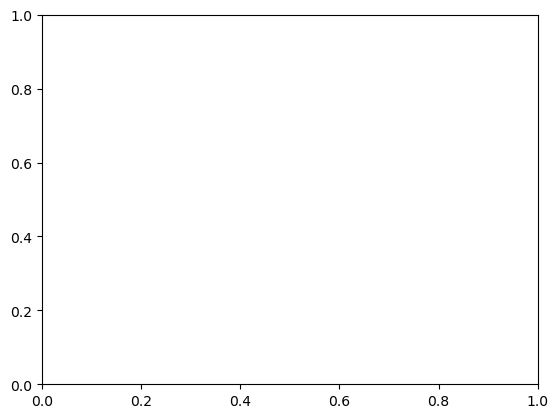

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fin_tum_vol.groupby['Drug Regimen']


## Line and Scatter Plots

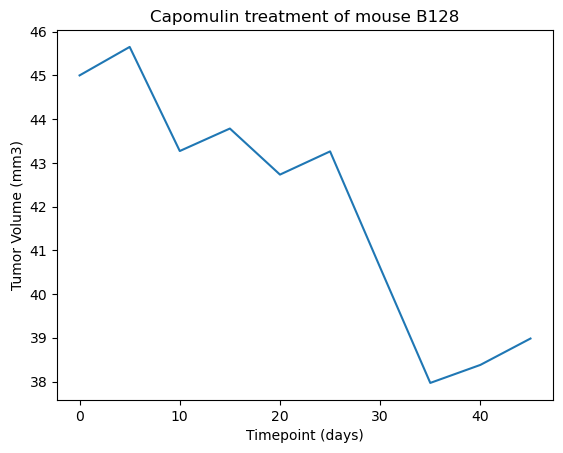

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128_cap = cleaned_df.loc[cleaned_df["Mouse ID"]=="b128", :]
plt.plot(b128_cap['Timepoint'], b128_cap['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse B128")
plt.show();

In [149]:
avg_tum_all = pd.DataFrame(cleaned_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
avg_tum_cap = pd.merge(avg_tum_all, cap_scatter, on = 'Mouse ID')
avg_tum_cap

,Mouse ID,Tumor Volume (mm3)_x,Timepoint,Tumor Volume (mm3)_y,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,41.963636,45,38.982878,2,Capomulin,Female,9,22
1,b742,40.083699,45,38.939633,0,Capomulin,Male,7,21
2,f966,36.505973,20,30.485985,0,Capomulin,Male,16,17
3,g288,41.990097,45,37.074024,1,Capomulin,Male,3,19
4,g316,44.613344,45,40.159220,2,Capomulin,Female,22,22
5,i557,44.805810,45,47.685963,1,Capomulin,Female,1,24
6,i738,39.141053,45,37.311846,2,Capomulin,Female,23,20
7,j119,44.465236,45,38.125164,1,Capomulin,Female,7,23
8,j246,43.216925,35,38.753265,1,Capomulin,Female,21,21
9,l509,44.434474,45,41.483008,3,Capomulin,Male,17,21


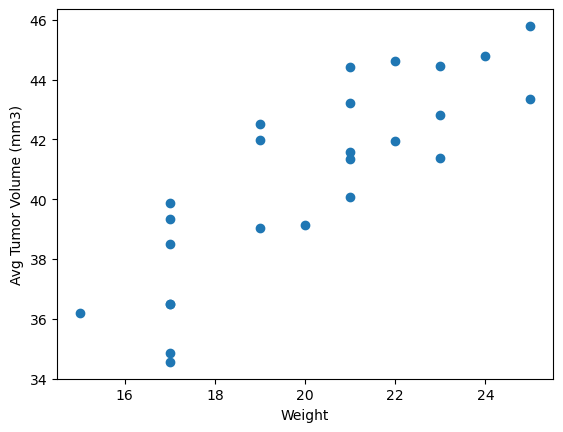

In [151]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_all = pd.DataFrame(cleaned_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
cap_scatter = fin_tum_vol.loc[fin_tum_vol['Drug Regimen']=='Capomulin']
avg_tum_cap = pd.merge(avg_tum_all, cap_scatter, on = 'Mouse ID')
x_axis = cap_scatter['Weight (g)']
y_axis = avg_tum_cap['Tumor Volume (mm3)_x']
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight")
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


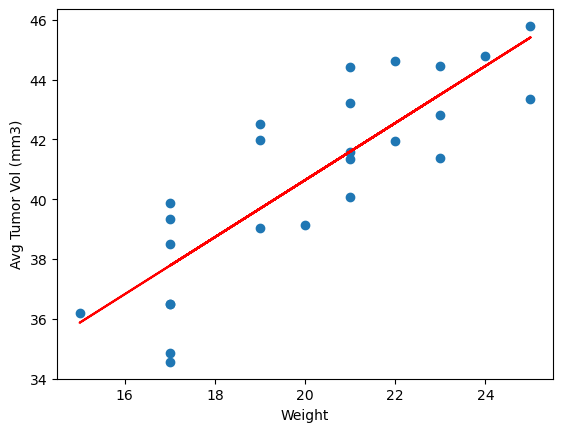

In [154]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = cap_scatter['Weight (g)']
y_axis = avg_tum_cap['Tumor Volume (mm3)_x']
corr = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
reg_val = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,reg_val,"r-")
plt.xlabel('Weight')
plt.ylabel('Avg Tumor Vol (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}.")
plt.show();
